# **Exploratory Data Analysis (EDA)**

TODO: Meter una breve explicación de porqué nos interesa el EDA y hablar a grandes rasgos de los datos. Decir que no son publicos y que si se quieren usar hay que pedirlos. Y poner referencia de a quien.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

# Load and preprocess data
df = pd.read_csv('gridSearch/data/05_mcvl_full_sample.csv', index_col='id', delimiter=';')
#print(df['fecha'].head(20))
# Convert 'date_column' to datetime
# %d (day with leading zeros); %b (abbreviated month name); %Y (four-digit year)
df['fecha'] = pd.to_datetime(df['fecha'], format='%d%b%Y')
# Generate the month column
df['mes'] = df['fecha'].dt.month

# TODO: Explicar porqué nos quedamos con estos features
# y el porqué de las transformaciones
df_desc = df[['empleado', 'edad_cat', 'sexo', 'educa_cat', 'expe', 'paro', 'fecha', 'dias_trab', 'paro_ultimo']]

df_desc.loc[:, 'empleado'] = df_desc['empleado'] * 100
df_desc.loc[:, 'paro_ultimo'] = (df_desc['paro_ultimo'] / 30.42).round(1) # 365/12 = 30.42
df_desc.loc[:, 'dias_trab'] = (df_desc['dias_trab'] / 30.42).round(1) # 365/12 = 30.42

In [3]:
df_desc.head()

,empleado,edad_cat,sexo,educa_cat,expe,paro,fecha,dias_trab,paro_ultimo
id,,,,,,,,,
17,0,30-45,Female,Sin estudios,0,0-3m,2000-01-11,0.0,0.0
17,0,30-45,Female,Sin estudios,0,0-3m,2000-02-08,0.0,1.0
17,0,30-45,Female,Sin estudios,0,0-3m,2000-03-14,0.0,2.1
17,0,30-45,Female,Sin estudios,0,4-6m,2000-04-11,0.0,3.1
17,0,30-45,Female,Sin estudios,0,4-6m,2000-05-09,0.0,4.0


### TODO: Añadir título de sección y si tal breve explicacion

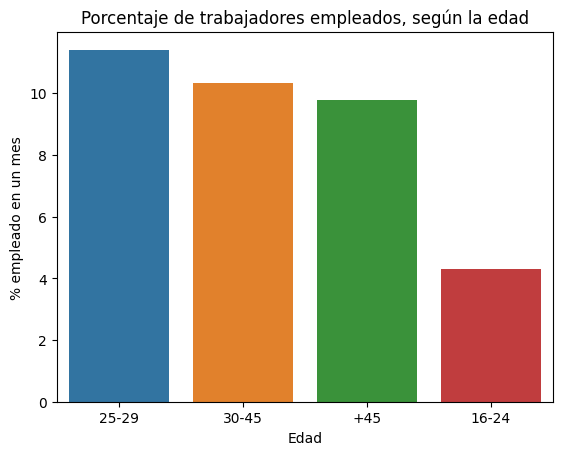

In [4]:
# Calculate mean of column Y by categories in column X
mean_values = df_desc.groupby('edad_cat')['empleado'].mean().reset_index()

# Sort the mean values dataframe in descending order
mean_values = mean_values.sort_values(by='empleado', ascending=False)

# Create bar graph
sns.barplot(x='edad_cat', y='empleado', data=mean_values)
plt.xlabel('Edad')
plt.ylabel('% empleado en un mes')
plt.title('Porcentaje de trabajadores empleados, según la edad')

plt.show()

### TODO: Añadir título de sección y si tal breve explicacion

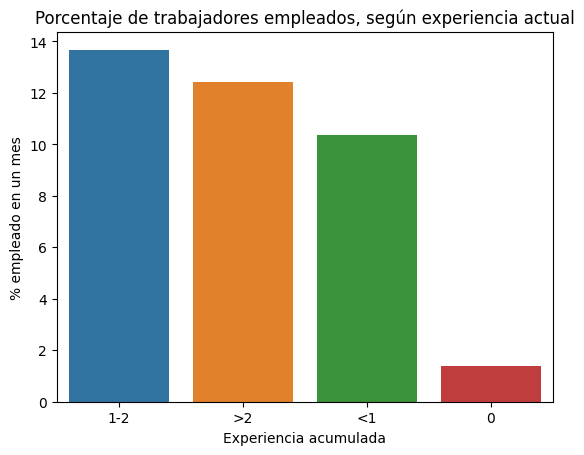

In [5]:
# Calculate mean of column Y by categories in column X
mean_values = df_desc.groupby('expe')['empleado'].mean().reset_index()

# Sort the mean values dataframe in descending order
mean_values = mean_values.sort_values(by='empleado', ascending=False)

# Create bar graph
sns.barplot(x='expe', y='empleado', data=mean_values)
plt.xlabel('Experiencia acumulada')
plt.ylabel('% empleado en un mes')
plt.title('Porcentaje de trabajadores empleados, según experiencia actual')

plt.show()

### TODO: Añadir título de sección y si tal breve explicacion

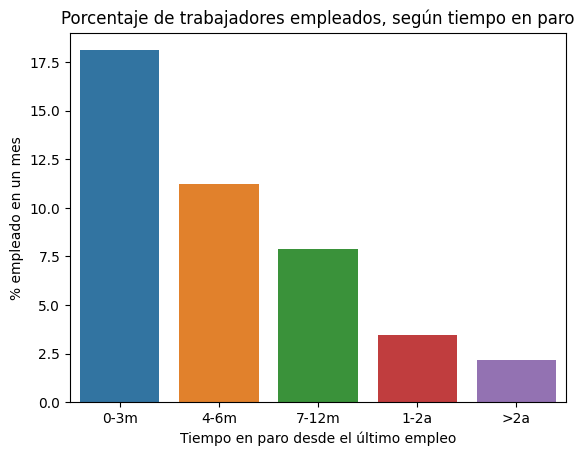

In [6]:
# Calculate mean of column Y by categories in column X
mean_values = df_desc.groupby('paro')['empleado'].mean().reset_index()

# Sort the mean values dataframe in descending order
mean_values = mean_values.sort_values(by='empleado', ascending=False)

# Create bar graph
sns.barplot(x='paro', y='empleado', data=mean_values)
plt.xlabel('Tiempo en paro desde el último empleo')
plt.ylabel('% empleado en un mes')
plt.title('Porcentaje de trabajadores empleados, según tiempo en paro')

plt.show()

### TODO: Añadir título de sección y si tal breve explicacion

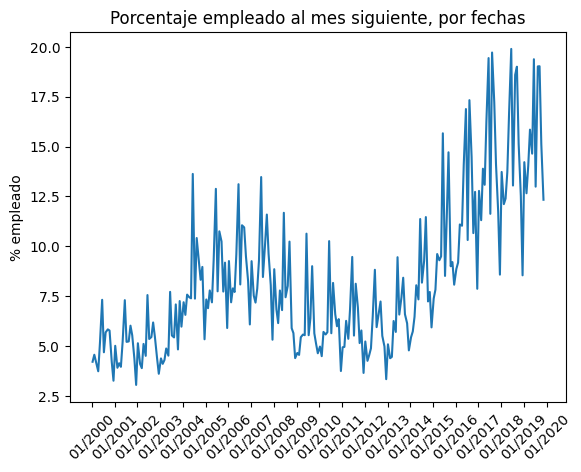

In [7]:
# Calculate average Y by month and year
avg_values = df_desc.groupby(df_desc['fecha'])['empleado'].mean().reset_index()

# Create line plot using seaborn
sns.lineplot(x='fecha', y='empleado', data=avg_values)

# Get the current axes
ax = plt.gca()

# Set the x-axis formatter to display only January for each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('% empleado')
plt.title('Porcentaje empleado al mes siguiente, por fechas')
plt.xticks(rotation=45)
plt.show()

### TODO: Añadir título de sección y si tal breve explicacion
aquí habría que hablar de los nuevos datos que cargas y decir una vez mas que no son publicos y que hay que pedirlos blabla

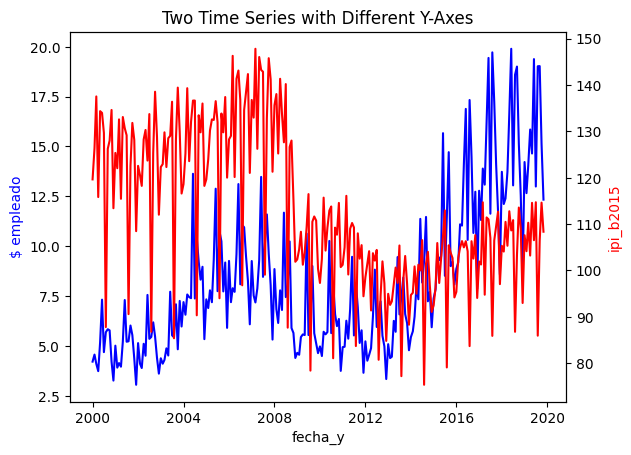

In [8]:
# Import IPI from INE
ipi = pd.read_excel('gridSearch/data/ipi_spain_ine.xlsx', sheet_name='clean')
ipi.rename(columns = {'fecha_ym':'fecha'}, inplace = True)
ipi['year'] = ipi['fecha'].dt.year
ipi['month'] = ipi['fecha'].dt.month

# Generate a monthly series of employment to merge with 
avg_values['year'] = avg_values['fecha'].dt.year
avg_values['month'] = avg_values['fecha'].dt.month

# Merge all files
merged_df = pd.merge(avg_values, ipi, left_on=['year', 'month'], right_on=['year', 'month'])

# Create a figure with two subplots
fig, ax1 = plt.subplots()

# Plot the first time series on the first y-axis
ax1.plot(merged_df['fecha_y'], merged_df['empleado'], color='b')
ax1.set_xlabel('fecha_y') # TODO: Habría que poner un nombre más descriptivo
ax1.set_ylabel('$ empleado', color='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second time series on the second y-axis
ax2.plot(merged_df['fecha_y'], merged_df['ipi_b2015'], color='r')
ax2.set_ylabel('ipi_b2015', color='r')

# Set labels and title
plt.title('Two Time Series with Different Y-Axes') # TODO: Habría que poner un nombre más descriptivo

plt.show()